# Kecerdasan Buatan

## Tugas 1: Model Linear

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi tugas1_NIM.ipynb.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

_Packages_ yang Anda akan gunakan dalam mengerjakan tugas ini antara lain:

- keras
- matplotlib
- numpy
- pandas
- pillow
- scipy
- seaborn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda. Untuk kode yang Anda ambil dari sumber lain, **cantumkan URL menuju referensi tersebut jika diambil dari internet**!

Perhatikan poin untuk tiap soal! **Semakin kecil poinnya, berarti kode yang diperlukan untuk menjawab soal tersebut seharusnya semakin sedikit!**

**Nilai akhir: XX/40**

### Deskripsi Dataset

Pada tugas kali ini, Anda akan mencoba menggunakan metode *machine learning* untuk melakukan dua jenis prediksi: **regresi** dan **klasifikasi**.

**Untuk kasus regresi**, Anda diminta untuk memprediksi jumlah penjualan berdasarkan uang yang dihabiskan pada media iklan yang digunakan. Terdapat tiga media iklan, yaitu TV, Radio dan Newspaper. Dengan detail atribut sebagai berikut:

- TV: biaya yang dihabiskan untuk iklan tayangan TV untuk setiap satu produk dalam sebuah pasar (dalam ribuan dollar)
- Radio: biaya yang dihabiskan untuk iklan di radio (dalam ribuan dollar)
- Newspaper: biaya yang dihabiskan untuk iklan di koran (dalam ribuan dollar)
- Sales: penjualan dari setiap satuan produk pada suatu pasar (dalam ribuan widget)

**Untuk kasus klasifikasi**, Anda akan menggunakan dataset Food-101 yang memiliki 101 kategori makanan dengan total 101.000 gambar makanan. Dataset untuk tugas ini diambil dari Food-101 (https://www.vision.ee.ethz.ch/datasets_extra/food-101/). Untuk versi yang lebih sederhana, Anda hanya akan membandingkan apakah gambar yang diberikan berupa *sushi* atau *pizza*. Anda akan melakukan klasifikasi menggunakan algoritma regresi logistik dan neural networks dalam tugas ini.

### Mengimpor Modul dan Dataset

In [0]:
from __future__ import print_function, division # Gunakan print(...) dan bukan print ...
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import requests

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

RANDOM_STATE = 1337
np.random.seed(RANDOM_STATE)

## 1. Eksplorasi Awal Data - Advertising (6 poin)

In [0]:
df = pd.read_csv('https://github.com/aliakbars/uai-ai/raw/master/datasets/advertising.csv', index_col=0)

### Soal 1.1.a (1 poin)

Laporkan deskripsi dari Advertising dataset dengan menggunakan metode dari Pandas!

In [3]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Soal 1.1.b (2 poin)

Berapa nilai `sales` paling rendah dan nilai `sales` paling tinggi dari data yang Anda miliki? 
Berapa ribu dollar uang yang dihabiskan untuk membayar biaya iklan di `TV`, `radio`, dan `newspaper` untuk produk tersebut?


In [4]:
min = df.sales.min()
max = df.sales.max()

df[(df['sales']==min) | (df['sales']==max)]

,TV,radio,newspaper,sales
131,0.7,39.6,8.7,1.6
176,276.9,48.9,41.8,27.0


### Soal 1.2 (3 poin)

Gambarkan scatter plot dari `sales` terhadap media iklan `TV`, `radio`, dan `newspaper`.

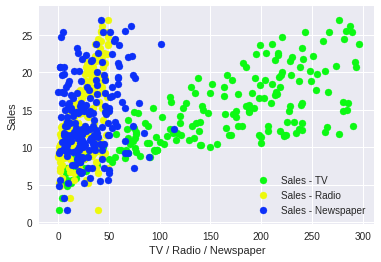

In [5]:
plt.scatter(df.TV,df.sales,c='#0cf913')
plt.scatter (df.radio, df.sales,c='#edf90c')
plt.scatter (df.newspaper, df.sales,c='#0c30f9')
plt.xlabel ('TV / Radio / Newspaper')
plt.ylabel ('Sales')
plt.legend (['Sales - TV','Sales - Radio','Sales - Newspaper'])

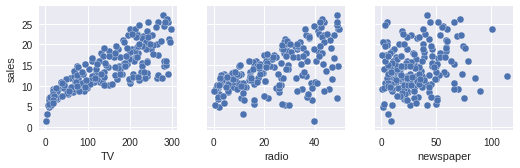

In [6]:
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales')

#Referensi
https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

## 2. Prediksi Penjualan Berdasarkan Biaya Media Iklan dengan Regresi Linear (19 poin)

### Soal 2.1 (4 poin)

Kita akan membuat simple linear regression dengan satu fitur. Dalam kasus ini, mari mencoba melihat hubungan antara `sales` dengan biaya untuk media iklan di `TV`.

Ambil fitur dari kolom `TV` dan response dari kolom `sales`, kemudian buat sebuah model linear regression menggunakan pustaka scikit-learn dan latih model tersebut dengan data yang Anda miliki! Laporkan nilai bias dan koefisiennya. Lalu, jelaskan bagaimana intepretasi Anda terhadap koefisien dari model yang Anda miliki.

*Petunjuk: Lihat cara penggunaan pustakanya di [sini](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py).*

In [7]:
#Regresi linear
reg = LinearRegression()
reg.fit(df[['TV']],df.sales)

print ("Nilai bias = ", reg.intercept_)
print ("Nilai koefisien = ", reg.coef_)

Nilai bias =  7.032593549127695
Nilai koefisien =  [0.04753664]


#Referensi
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

Koefisien menunjukan hubungan antara variabel dependen dan variabel independen, maka koefisien 0.04 merupakan koefisien yang menandakan bahwa hubungan variabelnya sangat rendah. 
- 0,00 - 0,199 = sangat rendah 
- 0,20 - 0,399 = rendah 
- 0,40 - 0,599 = sedang 
- 0,60 - 0,799 = kuat 
- 0,80 - 1,000 = sangat kuat

### Soal 2.2.a (3 poin)

Mari kita lihat seberapa baik garis regresi yang dibuat dari model yang Anda miliki. Buatlah prediksi dari biaya `TV` yang paling minimum dan biaya `TV` yang paling maksimum! Gambarkan scatter plot dan garis regresi model Anda atas prediksi tersebut. Bagaimana garis tersebut mencocokkan data Anda?

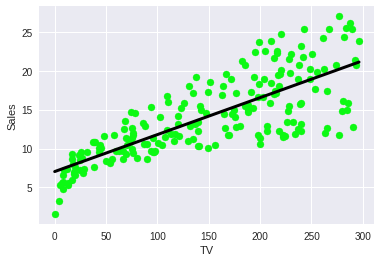

In [8]:
from sklearn.pipeline import make_pipeline

tv = df.TV
sales = df.sales

x = tv.values
y = sales.values

x = x.reshape(tv.count(),1)
y = y.reshape(sales.count(),1)

poly_model = make_pipeline(LinearRegression())

poly_model.fit(x,y)
xfit = np.linspace(0,tv.max(),tv.count())
yfit = poly_model.predict(xfit[:,np.newaxis])

plt.scatter(x,y,color='#0cf913')
plt.plot(xfit, yfit, color = 'black',linewidth = 3)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

#Referensi
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

### Soal 2.2.b (3 poin)

Coba lakukan kembali regresi pada data tersebut, tetapi kali ini gunakan fungsi basis polinomial orde 3. Gambarkan kembali scatter plot dan fungsi regresinya.

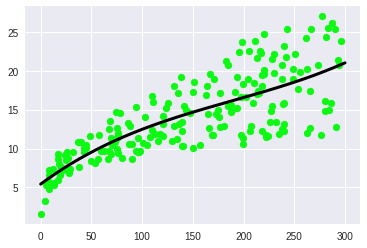

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

x = tv.values
y = sales.values
x = x.reshape(tv.count(),1)
y = y.reshape(sales.count(),1)

poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())

poly_model.fit(x,y)
xfit = np.linspace(0,300,tv.count())
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x,y,color='#0cf913')
plt.plot(xfit,yfit, color='black', linewidth='3')
plt.show()

#Referensi
Lab 1 praktikum AI

### Soal 2.2.c (3 poin)

Salah satu cara untuk memastikan bahwa model yang Anda hasilkan sudah cukup baik pada model regresi adalah dengan menghitung nilai *mean squared error* (MSE). Coba hitung nilai MSE untuk regresi dengan dan tanpa fungsi basis polinomial seperti yang Anda kerjakan pada bagian a dan b. Apa yang dapat Anda amati? Apakah nilainya sesuai dengan ekspektasi Anda?

In [10]:
# The mean squared error
print("Nilai Mean Squared Error tanpa basis polinomial = " ,mean_squared_error(y, reg.predict(x)))

# The mean squared error
print("Nilai Mean Squared Error dengan basis polinomial= " ,mean_squared_error(y, yfit))

Nilai Mean Squared Error tanpa basis polinomial =  10.512652915656757
Nilai Mean Squared Error dengan basis polinomial=  45.88106189103825


Dari hasil diatas, dapat diketahui nilai MSE dengan basis polinomial lebih kecil dari tanpa basis polinomial, karena fungsi polinomial lebih baik untuk prediksinya daripada hanya menggunakan linear regression, terutama pada kasus non-linear

### Soal 2.3.a (4 poin)

Sekarang kita akan melakukan Multiple Linear Regression. Buatlah sebuah model dengan menggunakan Linear Regression dari scikit-learn untuk fitur `TV`, `radio`, dan `newspaper`. Variabel dependen yang digunakan adalah `sales`. Keluarkan pula nilai bias dan nilai koefisien ketiga fitur tersebut. Sebelum itu, bagi dataset menjadi data latih dan data uji dengan proporsi data uji sebanyak 20%.

In [11]:
a = df[['TV','radio','newspaper']]

x_train, x_test, y_train, y_test = train_test_split (a,sales, train_size = 0.8, test_size = 0.2, random_state=RANDOM_STATE)

reg = LinearRegression()
reg.fit(x_train,y_train)

print ("Nilai bias = ", reg.intercept_)
print ("Nilai koefisien = ", reg.coef_)

Nilai bias =  3.1115315362412534
Nilai koefisien =  [ 0.04637974  0.18080161 -0.00164953]


#Referensi https://datatofish.com/multiple-linear-regression-python/

### Soal 2.3.b (2 poin)

Lakukan evaluasi model *multiple linear regression* yang Anda miliki dari data uji dengan menggunakan *mean squared error*.

In [12]:
# The mean squared error
print("Mean squared error: ", mean_squared_error(y_test, reg.predict(x_test)))

Mean squared error:  3.2807179562015216


## 3. Eksplorasi Awal Data Food-101 (3 poin)

Pertama, kita akan memuat data menggunakan kode di bawah ini. `X` merupakan gambar yang telah diterjemahkan dalam bentuk *tensor* atau array multidimensi. Dimensi pertama menunjukkan jumlah datanya, dua dimensi berikutnya menunjukkan panjang dan lebar dari gambarnya, dan dimensi keempat merupakan *channels* (RGB). Di sisi lain, `y` adalah kelas dari masing-masing gambar yang diberikan dalam `X` sehingga `X.shape[0] == y.shape[0]`.

In [0]:
def load_file(url):
    filename = url.split('/')[-1]
    with open(filename, 'wb') as f:
        resp = requests.get(url)
        f.write(resp.content)
    return np.load(filename)

In [14]:
X = load_file('https://github.com/aliakbars/uai-ai/raw/master/datasets/food.npy')
y = load_file('https://github.com/aliakbars/uai-ai/raw/master/datasets/food_labels.npy')

X.shape

(2001, 28, 28, 3)

### Soal 3.1 (1 poin)

Berapa banyak gambar sushi dan pizza masing-masing dalam dataset ini?

In [15]:
pizza = np.count_nonzero(y == 'pizza')
sushi = np.count_nonzero(y == 'sushi')

print("Jumlah gambar pizza = ","%d" %pizza)
print("Jumlah gambar sushi = ","%d" %sushi)

Jumlah gambar pizza =  1001
Jumlah gambar sushi =  1000


#Referensi
https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.sort.html

### Soal 3.2 (2 poin)

Gambarkan satu contoh pizza (indeks 0-1000) dan satu contoh sushi (indeks 1001-2000) dari dataset yang digunakan.

*Petunjuk: Anda dapat menggunakan `plt.imshow()`*

Text(0.5,1,'Gambar Sushi')

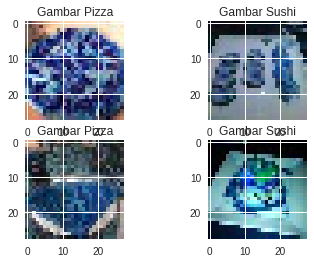

In [16]:
f, axarr = plt.subplots(2,2)
axarr[0, 0].imshow(X[0])
axarr[0, 0].set_title('Gambar Pizza')
axarr[0, 1].imshow(X[1001])
axarr[0, 1].set_title('Gambar Sushi')
axarr[1, 0].imshow(X[1000])
axarr[1, 0].set_title('Gambar Pizza')
axarr[1, 1].imshow(X[2000])
axarr[1, 1].set_title('Gambar Sushi')

#Referensi
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html

## 4. Klasifikasi Gambar Pizza dan Sushi Menggunakan Logistic Regression (12 poin)

### Soal 4.1 (1 poin)

Bagi dataset Anda menjadi 70-30 untuk training-test sets.

In [17]:
x_train, x_test, y_train, y_test = train_test_split (X,y, train_size = 0.7, test_size = 0.3, random_state = RANDOM_STATE)
x_train.shape
x_test.shape

(601, 28, 28, 3)

### Soal 4.2.a (4 poin)

Buat gambar yang berbentuk matriks pixel yang ada menjadi flat, lalu lakukan regresi logistik ke data yang telah Anda bagi tadi.

In [18]:
x_train = x_train.flatten()
x_test = x_test.flatten()
y_train = y_train.flatten()
y_test = y_test.flatten()

logreg = LogisticRegression()
logreg.fit(x_train.reshape(1400,28*28*3),y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#Referensi https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.flatten.html

### Soal 4.2.b (2 poin)

Apa pendapat Anda tentang hasil klasifikasi tersebut? Apakah hasilnya sudah cukup baik?

In [19]:
x_test = x_test.reshape(601,28*28*3)
logreg.score(x_test,y_test)

0.562396006655574

Menurut saya klasifikasi menggunakan regresi logistik mendapatkan hasil yang lebih baik dibandingkan regresi linear. Karena, regresi logistik dapat menggunakan data multiple maupun polynomial, dan semakin tinggi nilai akurasinya maka semakin baik pula modelnya.

Dalam regresi linier, hasilnya (variabel dependen) adalah berkelanjutan(...,-2.-1,0,1,2,...). Sedangkan, dalam regresi logistik, hasilnya (variabel dependen) hanya memiliki jumlah nilai yang terbatas (0 sampai 1)

### Soal 4.3 (5 poin)

Apa kesimpulan Anda dari eksperimen sejauh ini? Apa yang dapat dilakukan untuk memperbaiki kinerja model regresi logistik?

Dengan menggunakan regresi logistik , dapat kita ketahui bahwa regresi logistik dapat memprediksi data secara kategorikal (Pizza, sushi). Dan untuk memperbaiki kinerja model regresi logistik menggunakan fungsi galat, maximum likelihood dan dengan belajar untuk menuruni tingkat errornya

## 5. Bonus: Klasifikasi Gambar Pizza dan Sushi Menggunakan Deep Learning (5 poin)

Coba klasifikasikan data Food-101 untuk kedua jenis makanan diatas dengan menggunakan pustaka dari Keras untuk *deep learning* atau *neural networks*. Jangan lupa untuk melaporkan akurasi dan *confusion matrix*-nya. Adaptasi kode di atas dan lihat pula contoh kode di [sini](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py). Coba buat Convolutional Neural Network dan jalankan kodenya. Kode *deep learning* Anda hanya dinilai jika berhasil berjalan.

*Petunjuk: Anda mungkin perlu mengubah dimensi dari data latih dan data uji Anda menjadi $n \times d \times d \times 1$ dengan 1 dimensi terakhir adalah channel hitam-putih. Nilainya bisa menjadi 3 jika kita menggunakan channel warna RGB.*

*Anda mungkin perlu menggunakan representasi one-of-K untuk label yang digunakan. Anda dapat menggunakan `keras.utils.to_categorical` untuk melakukan hal ini. Silakan mencontoh kode untuk deep neural networks sederhana di [sini](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py) atau dengan menggunakan convolutional neural networks di [sini](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py).*

In [35]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 32
num_classes = 10
epochs = 20

# the data, split between train and test sets
X = load_file('https://github.com/aliakbars/uai-ai/raw/master/datasets/food.npy')
y = load_file('https://github.com/aliakbars/uai-ai/raw/master/datasets/food_labels.npy')

for i in range(2001):
  if y[i] == 'pizza':
    y[i] = 1;
  else:
    y[i] = 0;
    
x_train, x_test, y_train, y_test = train_test_split (X,y, train_size = 0.7, test_size = 0.3, random_state = RANDOM_STATE)

x_train = x_train.reshape(1400, 2352)
x_test = x_test.reshape(601, 2352)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(2352,)))
model.add(Dropout(0.5))
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 32)                75296     
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                330       
Total params: 75,626
Trainable params: 75,626
Non-trainable params: 0
_________________________________________________________________
Train on 1400 samples, validate on 601 samples
Epoch 1/20
1400/1400 [==============================] - 1s 819us/step - loss: 1.1828 - acc: 0.4386 - val_loss: 0.7041 - val_acc: 0.5607
Epoch 2/20
1400/1400 [==============================] - 0s 121us/step - loss: 0.9216 - acc: 0.5143 - val_loss: 0.6707 - val_acc: 0.5557
Epoch 3/20
1400/1400 [=========================

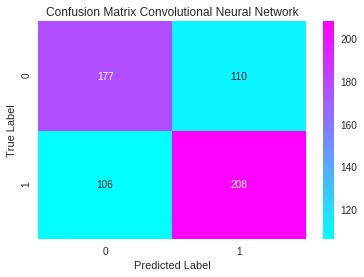

In [38]:
y_pred = model.predict_classes(x_test)
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)

ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="cool") #-___-
ax.set_title('Confusion Matrix Convolutional Neural Network')
#ax.set_yticklabels(le.inverse_transform([1,0]))
#ax.set_xticklabels(le.inverse_transform([0,1]))
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()